# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
def dice(n):
    results = []
    for i in range(n):
        results.append(random.randint(1, 6))
    return results

In [3]:
list_10 = dice(10)
dice_10_times = pd.DataFrame(list_10,columns=['result'])
dice_10_times

,result
0,5
1,6
2,3
3,5
4,1
5,3
6,2
7,3
8,2
9,4


#### 2.- Plot the results sorted by value.

In [4]:
dice_10_times = dice_10_times.sort_values(by='result').reset_index().drop(columns='index')

Text(0.5, 0, 'Round')

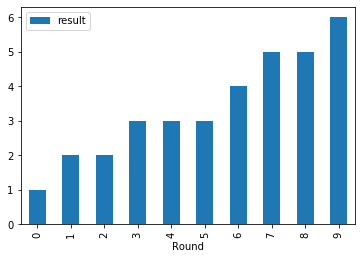

In [5]:
dice_10_times.plot(kind='bar')
plt.xlabel('Round')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

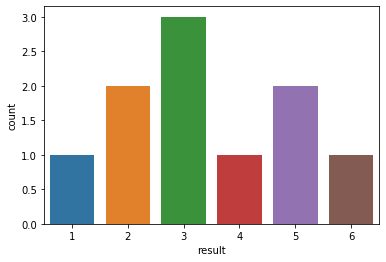

In [6]:
sns.countplot(x="result",data=dice_10_times)

In [7]:
"""
Both the countplot above or a histogram are plots of the frequency distribution of 
numeric array by splitting it to small equal-sized bins.
Therefore we can look at the frequency distribution by looking directly at the graph above.

We can see that the size 1 was not rolled 
5 was the most rolled
3 and 4 was the least rolled 
"""

'\nBoth the countplot above or a histogram are plots of the frequency distribution of \nnumeric array by splitting it to small equal-sized bins.\nTherefore we can look at the frequency distribution by looking directly at the graph above.\n\nWe can see that the size 1 was not rolled \n5 was the most rolled\n3 and 4 was the least rolled \n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
def mean_function(i):
    retult = sum(i)/len(i)
    return retult

In [9]:
mean_function(list_10)

3.4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [10]:
#the mean is also the freq*number 
count_numbers = dice_10_times['result'].value_counts()
frequency = list(zip(count_numbers.index, count_numbers.values))
frequency = [item[0] * item[1] for item in frequency]
mean_2 = sum(frequency)/sum(count_numbers.values)
mean_2

3.4

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [11]:
#there are 2 cases: if the len of the #rounds is even and if it's odd

def median(i):
    #if its even
    if len(i)%2 == 0:
        median = (len(i)/2 + len(i)/2-1)/2
    #if its odd
    else:
        median = int(len(i)/2) 
    return median   

In [12]:
median(list_10)

4.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [13]:
def quantile(list_10):
    q1 = int((len(list_10)+1)*0.25)
    q2 = median(list_10)
    q3 = int((len(list_10)+1)*0.75)
    return q1,q2,q3

quantile(list_10)

(2, 4.5, 8)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [14]:
df = pd.read_csv('../data/roll_the_dice_hundred.csv')
df

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


In [15]:
df = df.sort_values(by = 'value')
df

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


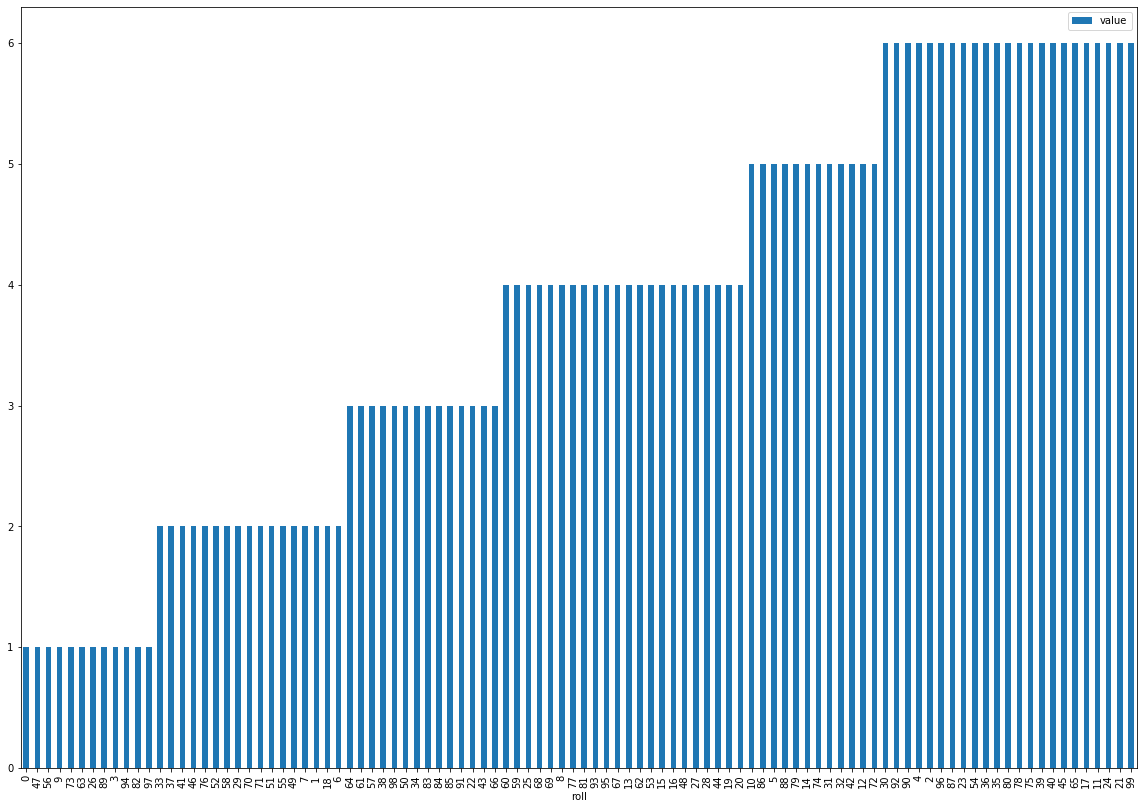

In [16]:
df.plot(x='roll', y='value', kind='bar', figsize=(20,14))

In [17]:
"""
From the graph above you can clearly see that values that were rolled 
most times (4 and 6) and the ones rolled less (1) from the with width
of the "levels" of values
""" 

'\nFrom the graph above you can clearly see that values that were rolled \nmost times (4 and 6) and the ones rolled less (1) from the with width\nof the nest of bars \n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [19]:
df_mean = mean_function(df['value'])
df_mean

3.74

#### 3.- Now, calculate the frequency distribution.


In [23]:
counts = df['value'].value_counts()
frequency = list(zip(counts.index, counts.values))

frequency

[(6, 23), (4, 22), (2, 17), (3, 14), (5, 12), (1, 12)]

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

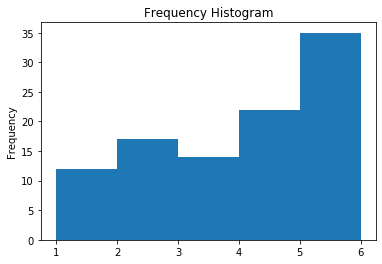

In [30]:
plt.hist(df['value'], bins=5)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [ ]:
"""
It has a shape more concentrated on the right (higher values)
Therefore its expected that the mean value is higher than 3 (and confirmed)
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

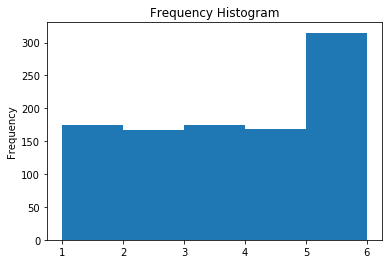

In [40]:
df1000 = pd.read_csv('../data/roll_the_dice_thousand.csv')

plt.hist(df1000['value'], bins=5)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [ ]:
"""
These values look more even distributed compared to the 100 rolls 
this is probably because the number of tries is way higher

"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [41]:
df = pd.read_csv('../data/ages_population.csv')
df

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [52]:
counts = df['observation'].value_counts()
frequency = dict(zip(counts.index, counts.values))
print(frequency)

{39.0: 45, 41.0: 36, 30.0: 34, 35.0: 33, 43.0: 32, 42.0: 32, 36.0: 31, 38.0: 30, 32.0: 30, 37.0: 30, 34.0: 29, 45.0: 29, 40.0: 27, 29.0: 26, 27.0: 25, 31.0: 24, 46.0: 23, 44.0: 23, 26.0: 23, 33.0: 22, 28.0: 20, 25.0: 19, 49.0: 19, 48.0: 19, 24.0: 18, 47.0: 17, 23.0: 17, 22.0: 16, 50.0: 16, 56.0: 15, 21.0: 14, 52.0: 14, 20.0: 13, 54.0: 13, 55.0: 13, 53.0: 12, 19.0: 11, 12.0: 11, 14.0: 10, 17.0: 10, 51.0: 9, 15.0: 8, 16.0: 8, 59.0: 8, 18.0: 7, 58.0: 7, 63.0: 7, 57.0: 7, 13.0: 6, 8.0: 5, 60.0: 4, 67.0: 4, 62.0: 4, 68.0: 3, 66.0: 3, 11.0: 3, 10.0: 3, 61.0: 2, 9.0: 2, 5.0: 2, 6.0: 2, 65.0: 2, 2.0: 2, 1.0: 2, 64.0: 2, 4.0: 1, 82.0: 1, 70.0: 1, 71.0: 1, 7.0: 1, 69.0: 1, 73.0: 1}


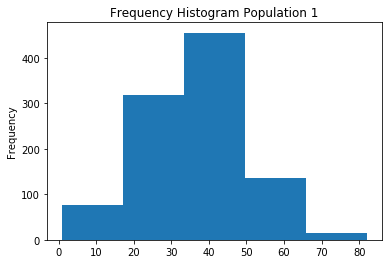

In [58]:
plt.hist(df['observation'], bins=5)
plt.gca().set(title='Frequency Histogram Population 1', ylabel='Frequency');

#the mean should be something between 25-35, by looking at the below plot
#I would guess a small standard deviation as well

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [59]:
df['observation'].mean()

36.56

In [56]:
df['observation'].std()

12.816499625976762

In [ ]:
"""
The mean was slightly higher than what I estimated before 
It's a positive skewed distribution
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [57]:
df2 = pd.read_csv('../data/ages_population2.csv')
df2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


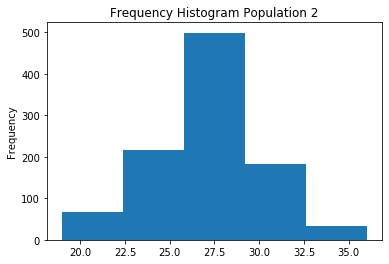

In [60]:
plt.hist(df2['observation'], bins=5)
plt.gca().set(title='Frequency Histogram Population 2', ylabel='Frequency');

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
The destribution is more concentrated aroung the center (possibly the mean value)
This a less skewed distribution
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [61]:
print(df2['observation'].mean())
print(df2['observation'].std())

27.155
2.969813932689186


In [ ]:
"""
Population 2 is, on average, younger than population1 (smaller mean value), 
as well as for the standard deviation.
This is expected by looking at the graph 
Population1 holds more broad ages (note that there are observations with 80 years old) vs a small range with population2
therefore its expected a smaller std. 
We can say that population 
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [62]:
df3 = pd.read_csv('../data/ages_population3.csv')
df3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


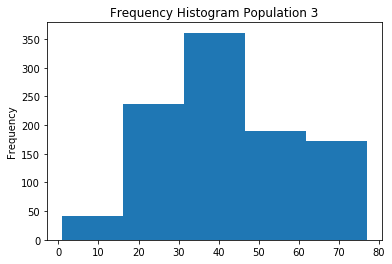

In [64]:
plt.hist(df3['observation'], bins=5)
plt.gca().set(title='Frequency Histogram Population 3', ylabel='Frequency');

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [63]:
print(df3['observation'].mean())
print(df3['observation'].std())

41.989
16.144705959865934


In [ ]:
"""
The mean above tell us that population from this neighbourhood is, on average, older than the other neighbourhoods
The bigger standard deviation figure indicates that the age observations on this neighbourhood are farther away from 
the mean, on average.This is reflected in a more spread out plot.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [68]:
q1 = np.quantile(df3, 0.25)
print("the first quartile is", q1)
q2 = np.quantile(df3, 0.50)
print("the second quartile is",q2)
q3 = np.quantile(df3, 0.75)
print("the third quartile is", q3)
q4 = np.quantile(df3, 0.1)
print("the fourth quartile is", q4)

the first quartile is 30.0
the second quartile is 40.0
the third quartile is 53.0
the fourth quartile is 22.0


In [ ]:
"""
The mean is very close to the median. 
An increase in the standard deviation reflects an increase in the distance between mean and the quantiles
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [70]:
print("Population 2")

q1 = np.quantile(df2, 0.25)
print("the first quartile is", q1)
q2 = np.quantile(df2, 0.50)
print("the second quartile is",q2)
q3 = np.quantile(df2, 0.75)
print("the third quartile is", q3)
q4 = np.quantile(df2, 0.1)
print("the fourth quartile is", q4)

Population 2
the first quartile is 25.0
the second quartile is 27.0
the third quartile is 29.0
the fourth quartile is 23.0


In [ ]:
"""
We see that the mean and median are very similar in population 2, given a ver low standard deviation. 
Besides, the remaining quantiles are also close.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [73]:
df_bcn= pd.concat([df, df2, df3], axis=1)
df_bcn.columns =['Population 1', 'Population 2', 'Population 3'] 
df_bcn

,Population 1,Population 2,Population 3
0,68.0,25.0,21.0
1,12.0,31.0,21.0
2,45.0,29.0,24.0
3,38.0,31.0,31.0
4,49.0,29.0,54.0
...,...,...,...
995,27.0,26.0,16.0
996,47.0,22.0,55.0
997,53.0,21.0,30.0
998,33.0,19.0,35.0


In [80]:
df_bcn.describe()

,Population 1,Population 2,Population 3
count,1000.0000,1000.000000,1000.000000
mean,36.5600,27.155000,41.989000
std,12.8165,2.969814,16.144706
min,1.0000,19.000000,1.000000
25%,28.0000,25.000000,30.000000
50%,37.0000,27.000000,40.000000
75%,45.0000,29.000000,53.000000
max,82.0000,36.000000,77.000000


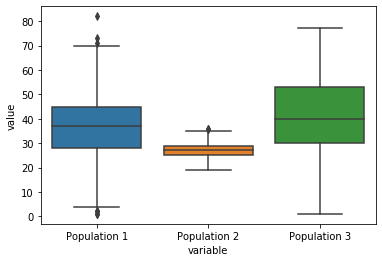

In [77]:
sns.boxplot(x="variable", y="value", data=pd.melt(df_bcn))

In [ ]:
"""
Boxplot allows it to be displayed in one dimension and its easily comparable with other distributions.
It's just visually simpler

Population 3 has the biggest dispersion of ages, 
while population 2 ages are significant distributed around the median. 

The boxplot also shows that population1 holds several outlier observations, represented by the dots 

"""